In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("datasets/tonnage-decheterie-par-type-dechet-par-dept.csv")
df[df["L_REGION"] == "Hauts-de-France"]

,ANNEE,C_REGION,L_REGION,C_DEPT,N_DEPT,C_TYP_REG_DECHET,L_TYP_REG_DECHET,TONNAGE_T
324,2009,32,Hauts-de-France,02,Aisne,02A,Déchets dangereux,548.93
325,2009,32,Hauts-de-France,02,Aisne,02B,Matériaux recyclables,10542.34
326,2009,32,Hauts-de-France,02,Aisne,02C,Déchets verts,24539.04
327,2009,32,Hauts-de-France,02,Aisne,02D,Encombrants,31592.73
328,2009,32,Hauts-de-France,02,Aisne,02F,DEEE,467.70
...,...,...,...,...,...,...,...,...
4905,2021,32,Hauts-de-France,80,Somme,02D,Encombrants,54148.57
4906,2021,32,Hauts-de-France,80,Somme,02G,Mobilier,4273.89
4907,2021,32,Hauts-de-France,80,Somme,02F,DEEE,3329.01
4908,2021,32,Hauts-de-France,80,Somme,02E,Déblais et gravats,46485.60


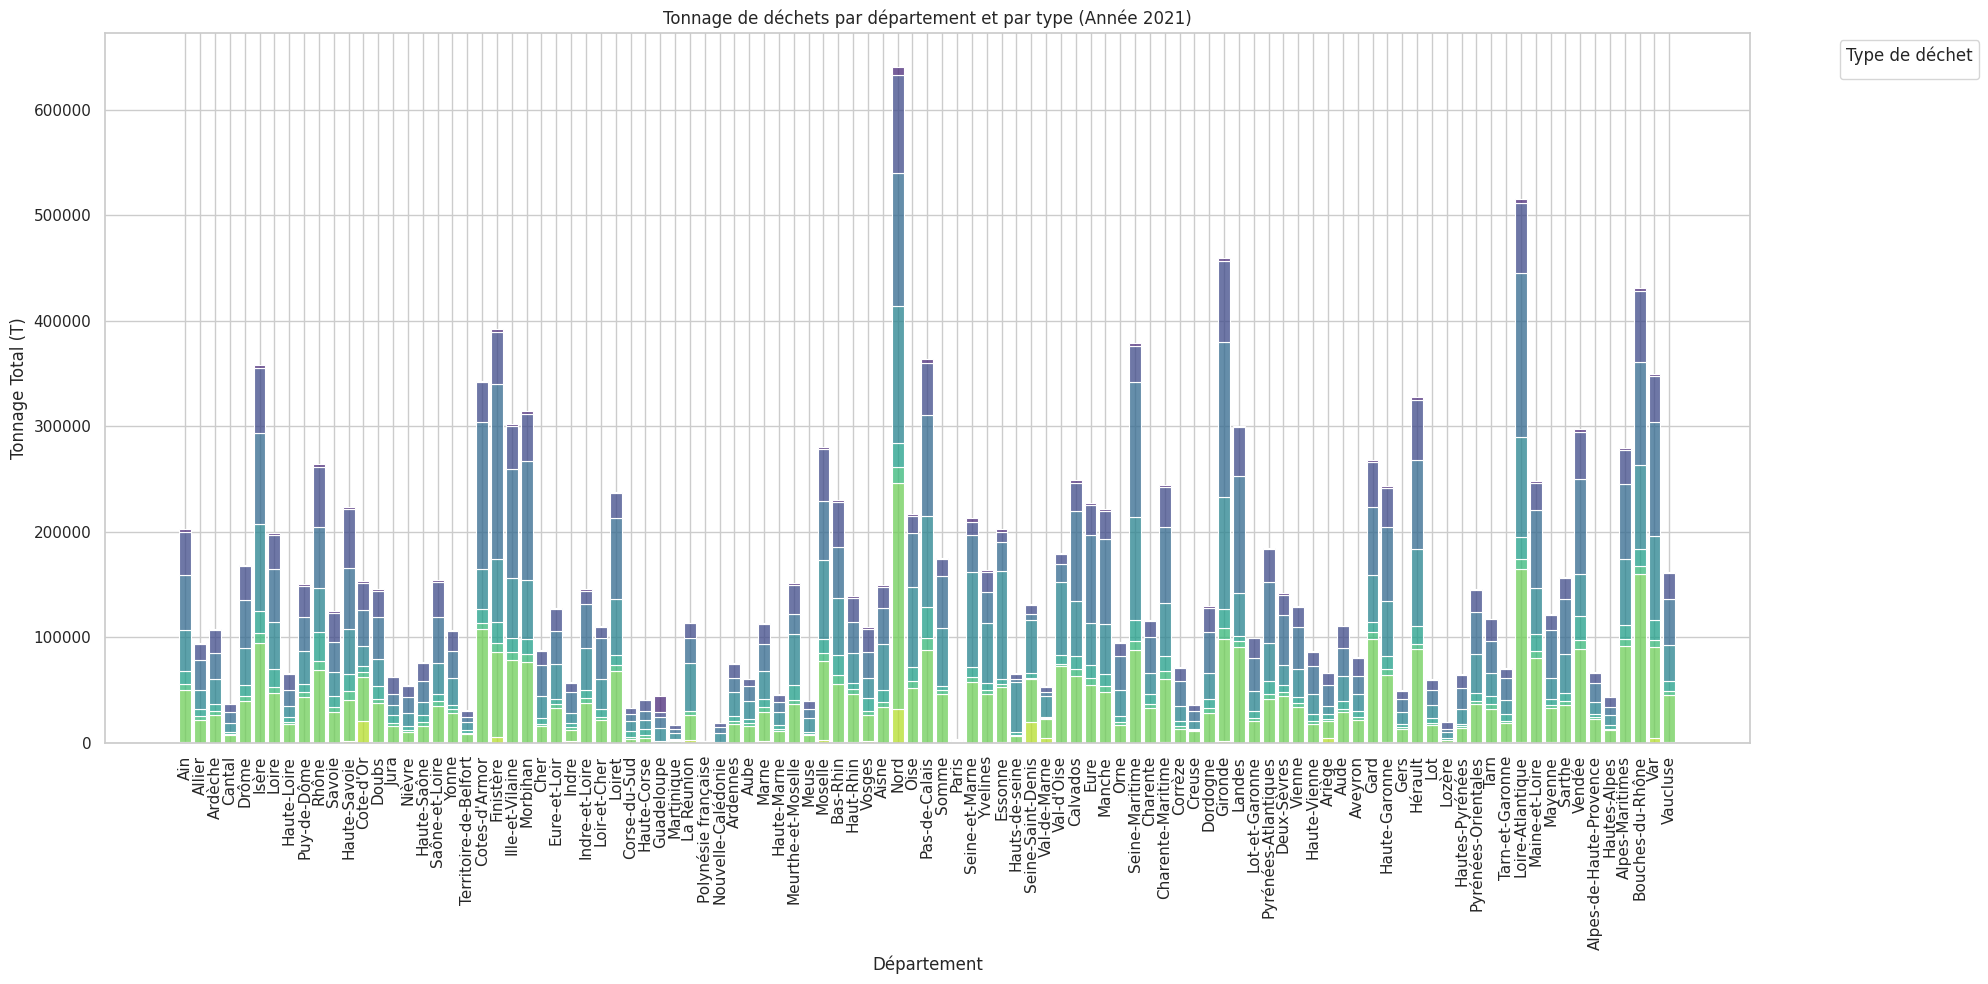

In [14]:
# Filter for the most recent year
df_2021 = df[df['ANNEE'] == 2021].copy()

# Sort departments by total tonnage for better visualization
dept_order = df_2021.groupby('N_DEPT')['TONNAGE_T'].sum().sort_values(ascending=False).index

# Set up the plot
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")

# Create stacked bar chart using histplot (good for categorical + weights)
# Note: histplot with multiple="stack" on categorical x-axis works like a stacked bar chart
ax = sns.histplot(
    data=df_2021,
    x='N_DEPT',
    hue='L_TYP_REG_DECHET',
    weights='TONNAGE_T',
    multiple='stack',
    palette='viridis',
    shrink=0.8
)

# Customize plot
plt.xticks(rotation=90)
plt.xlabel('Département')
plt.ylabel('Tonnage Total (T)')
plt.title('Tonnage de déchets par département et par type (Année 2021)')
plt.legend(title='Type de déchet', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('stacked_waste_tonnage.png')

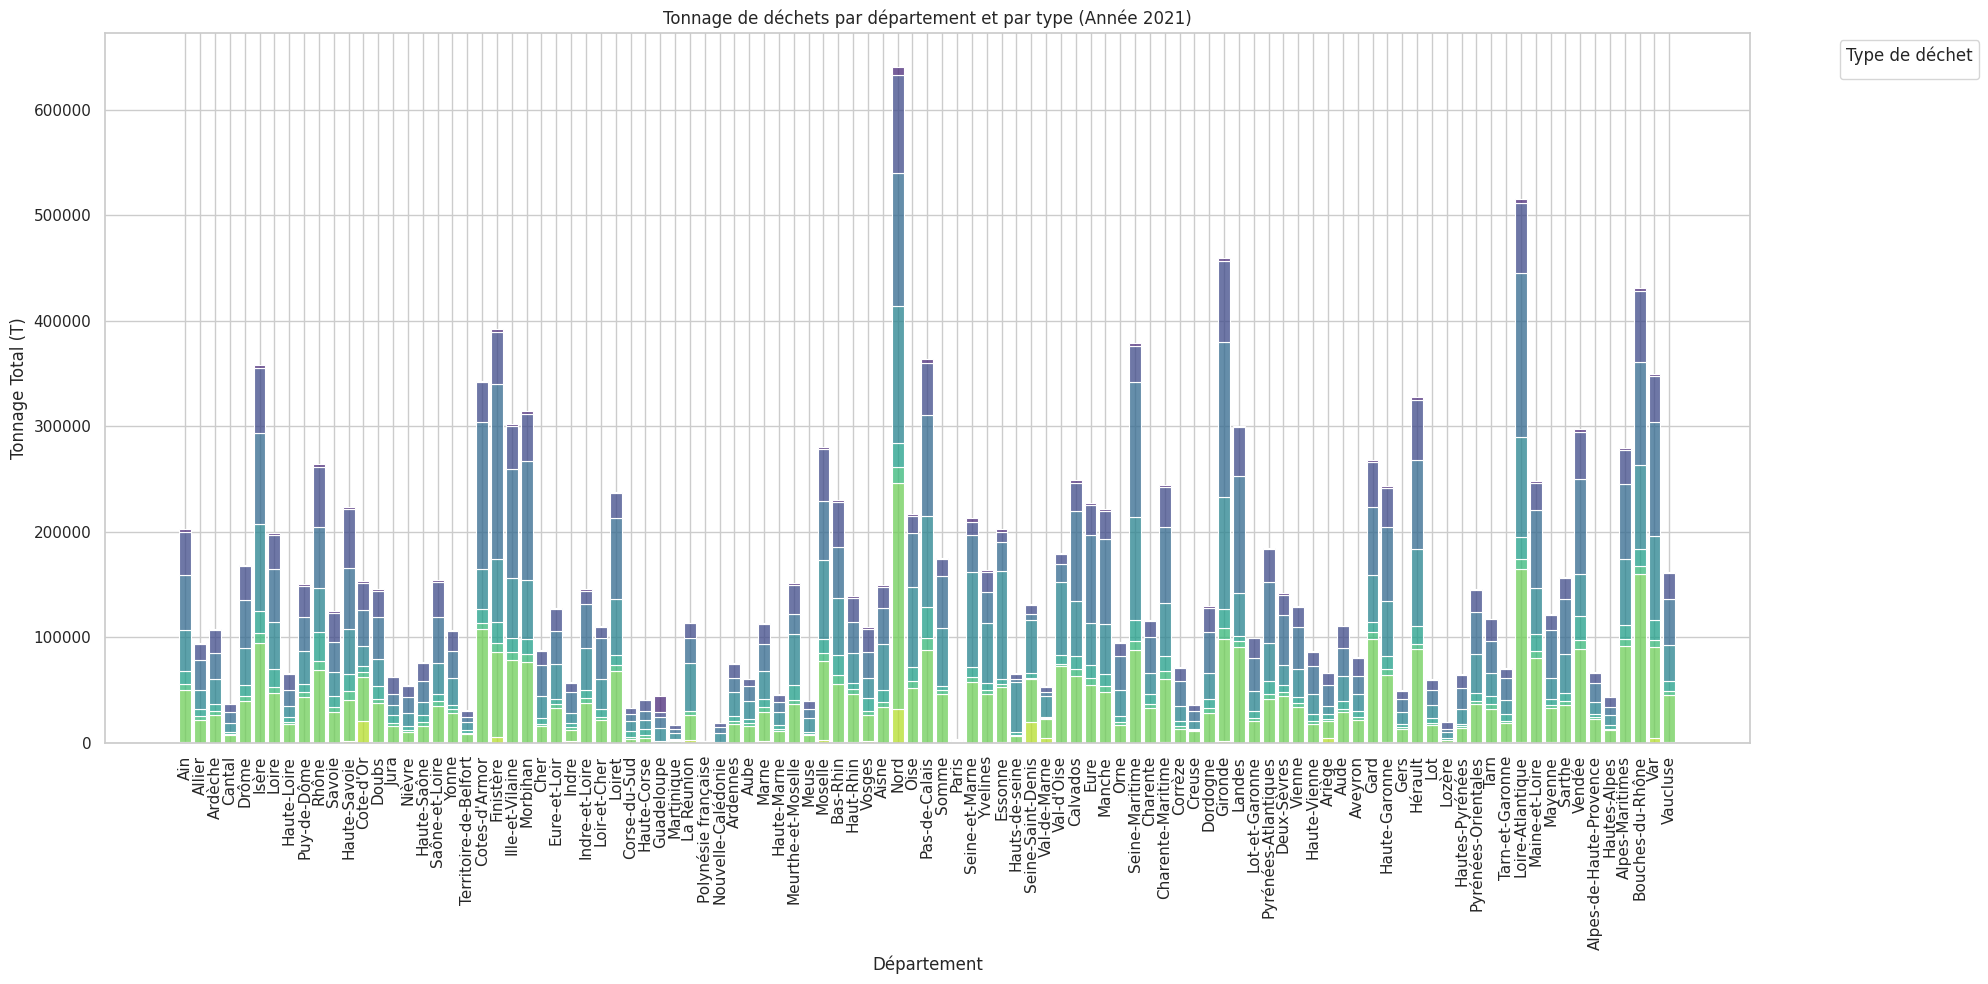

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for the most recent year
df_2021 = df[df['ANNEE'] == 2021].copy()

# Sort departments by total tonnage for better visualization
dept_order = df_2021.groupby('N_DEPT')['TONNAGE_T'].sum().sort_values(ascending=False).index

# Set up the plot
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")

# Create stacked bar chart using histplot (good for categorical + weights)
# Note: histplot with multiple="stack" on categorical x-axis works like a stacked bar chart
ax = sns.histplot(
    data=df_2021,
    x='N_DEPT',
    hue='L_TYP_REG_DECHET',
    weights='TONNAGE_T',
    multiple='stack',
    palette='viridis',
    shrink=0.8
)

# Customize plot
plt.xticks(rotation=90)
plt.xlabel('Département')
plt.ylabel('Tonnage Total (T)')
plt.title('Tonnage de déchets par département et par type (Année 2021)')
plt.legend(title='Type de déchet', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('stacked_waste_tonnage.png')

In [5]:
df_conso = pd.read_csv("datasets/CONSO_MENAGES_PRODUITS_CSV_FR/DD_CNA_CONSO_MENAGES_PRODUITS_data.csv",
                       sep=";",
                       encoding="utf-8",
                       engine="python")
df_conso

,ACCOUNTING_ENTRY,COUNTERPART_AREA,FREQ,PRICES,PRODUCT,REF_SECTOR,STO,TRANSFORMATION,UNIT_MEASURE,CONF_STATUS,DECIMALS,LAST_UPDATE,OBS_STATUS,OBS_STATUS_FR,UNIT_MULT,TIME_PERIOD,OBS_VALUE
0,D,W2,A,L,138G_E38Z,S1,P31,N,XDC,F,1,NaN,A,D,6,1976,1320.300
1,D,W2,A,L,138G_E38Z,S1,P31,N,XDC,F,1,NaN,A,D,6,2008,4413.900
2,D,W2,A,L,CPA_E38,S1,P31,N,XDC,F,1,NaN,A,D,6,1986,2010.500
3,D,W2,A,L,CPA_E38,S1,P31,GY,PT,F,3,NaN,A,D,0,1987,1.283
4,D,W2,A,L,CPA_E38,S1,P31,GY,PT,F,3,NaN,A,D,0,2001,5.756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027921,D,W2,A,Y,H_C11Z3,S1,P31,N,XDC,F,1,NaN,A,D,6,2022,140.900
1027922,D,W2,A,Y,H_C11Z3,S1,P31,N,XDC,F,1,NaN,P,SD,6,2023,140.000
1027923,D,W2,A,Y,138G_C23A,S1,P31,N,XDC,F,1,NaN,A,D,6,2022,947.800
1027924,D,W2,A,L,138G_C23A,S1,P31,GY_IX,IX,F,3,NaN,P,SD,0,2023,93.025


In [7]:
df_conso_metadata = pd.read_csv("datasets/CONSO_MENAGES_PRODUITS_CSV_FR/DD_CNA_CONSO_MENAGES_PRODUITS_metadata.csv",
                                sep=";",
                                encoding="utf-8",
                                engine="python")
df_conso_metadata

,COD_VAR,LIB_VAR,COD_MOD,LIB_MOD
0,ACCOUNTING_ENTRY,Position de compte,D,Emploi ou débit
1,ACCOUNTING_ENTRY,Position de compte,C,Ressource ou crédit
2,CONF_STATUS,Statut de confidentialité,F,Diffusable
3,COUNTERPART_AREA,Zone de contrepartie,W2,Territoire national
4,COUNTERPART_AREA,Zone de contrepartie,W0,Monde
...,...,...,...,...
668,UNIT_MEASURE,Unité de mesure,XDC,Devise nationale (Euros)
669,UNIT_MEASURE,Unité de mesure,IX,Indice
670,UNIT_MEASURE,Unité de mesure,PT,Pourcentage
671,UNIT_MULT,Quantité d'unités (en puissance de 10),6,Millions


In [2]:
from scipy.stats import linregress
from scipy.optimize import curve_fit
import numpy as np

In [21]:
df_nord = df[df["L_REGION"] == "Hauts-de-France"].copy()

# Group by Year and Waste Type
grouped = df_nord.groupby(['ANNEE', 'L_TYP_REG_DECHET'])['TONNAGE_T'].sum().reset_index()

grouped

results = []
waste_types = grouped['L_TYP_REG_DECHET'].unique()

for w_type in waste_types:
    subset = grouped[grouped['L_TYP_REG_DECHET'] == w_type]
    if len(subset) > 1:
        slope, intercept, r_value, p_value, std_err = linregress(subset['ANNEE'], subset['TONNAGE_T'])
        results.append({
            'Type': w_type,
            'Slope': slope,
            'Intercept': intercept,
            'R-squared': r_value**2,
            'P-value': p_value
        })

results_df = pd.DataFrame(results)
print(results_df)
results_df.to_csv('regression_results_hauts_de_france.csv', index=False)

                    Type         Slope     Intercept  R-squared   P-value
0         Autres déchets   1385.604821 -2.779723e+06   0.212556  0.297776
1                   DEEE   1963.509821 -3.930507e+06   0.915231  0.000733
2     Déblais et gravats   6264.785357 -1.223674e+07   0.683281  0.021850
3      Déchets dangereux    148.158929 -2.834481e+05   0.081487  0.534890
4          Déchets verts   8139.127143 -1.610107e+07   0.472593  0.087874
5            Encombrants   7854.365357 -1.549672e+07   0.834416  0.004037
6  Matériaux recyclables   5484.045714 -1.088952e+07   0.912807  0.000787
7               Mobilier  11638.296500 -2.343880e+07   0.991293  0.004363


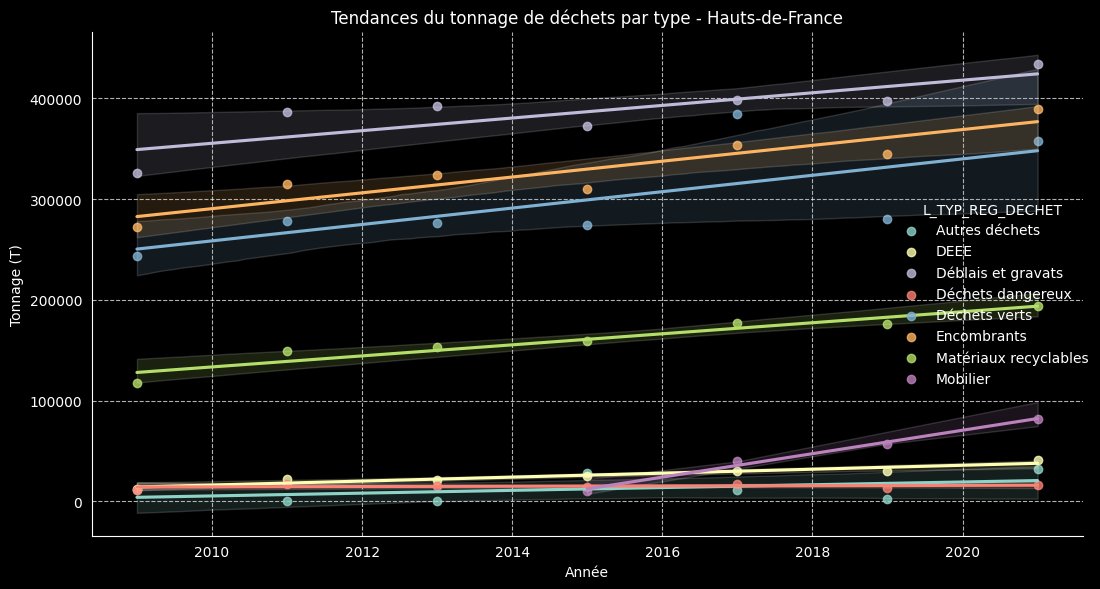

In [23]:
region_df = df[df['L_REGION'] == 'Hauts-de-France']
grouped = region_df.groupby(['ANNEE', 'L_TYP_REG_DECHET'])['TONNAGE_T'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lmplot(data=grouped, x='ANNEE', y='TONNAGE_T', hue='L_TYP_REG_DECHET', aspect=1.5, height=6)
plt.title('Tendances du tonnage de déchets par type - Hauts-de-France')
plt.xlabel('Année')
plt.ylabel('Tonnage (T)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('tendances_dechets_hauts_de_france.png')

print(results_df.to_string())